# Double sorted Fama-french portfolios
#### Author: Prof. Gustavo Soares

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tr_df = pd.read_csv('tr_df.csv', index_col=[0,1]).iloc[:,0].unstack().T.astype(float)
tr_df.index = pd.to_datetime(tr_df.index)
ibov_composition = pd.read_csv('ibov_composition.csv', index_col=[0,1])['Weights'].astype(float)
ibov_composition.index = pd.MultiIndex.from_tuples([(x, pd.to_datetime(d)) for x,d in ibov_composition.index])
ibov_composition = ibov_composition.unstack().T.fillna(0)
df = pd.read_csv('IBOV_time_series.csv', index_col=0).astype(float)
df.index = pd.to_datetime(df.index)

In [2]:
tr_df.tail()

ID,ABEV3 BS Equity,ACES4 BS Equity,AEDU3 BS Equity,AGEI3 BS Equity,ALLL11 BS Equity,ALLL3 BS Equity,ARCZ6 BS Equity,ASAI3 BS Equity,AZUL4 BS Equity,B3SA3 BS Equity,...,VALE3 BS Equity,VALE5 BS Equity,VCPA4 BS Equity,VIVO4 BS Equity,VIVT3 BS Equity,VIVT4 BS Equity,VVAR11 BS Equity,VVAR3 BS Equity,WEGE3 BS Equity,YDUQ3 BS Equity
DATE,,,,,,,,,,,,,,,,,,,,,
2021-04-27,4.723374,1.024391,1.499113,0.925473,0.716638,0.175124,0.290489,1.115686,1.758929,7.398730,...,3.334358,1.056646,0.494017,2.226151,2.991341,2.854102,0.605334,1.381824,13.617748,5.229025
2021-04-28,4.698660,1.024391,1.499113,0.925473,0.716638,0.175124,0.290489,1.120168,1.789732,7.489555,...,3.388860,1.056646,0.494017,2.226151,2.990645,2.854102,0.605334,1.388643,13.430094,5.273115
2021-04-29,4.714106,1.024391,1.499113,0.925473,0.716638,0.175124,0.290489,1.122220,1.794196,7.342838,...,3.389769,1.056646,0.494017,2.226151,3.022683,2.854102,0.605334,1.375006,13.058467,5.359477
2021-04-30,4.615252,1.024391,1.499113,0.925473,0.716638,0.175124,0.290489,1.137407,1.718750,7.196120,...,3.301050,1.056646,0.494017,2.226151,3.008753,2.854102,0.605334,1.344324,12.881852,5.241253
2021-05-01,4.615252,1.024391,1.499113,0.925473,0.716638,0.175124,0.290489,1.137407,1.718750,7.196120,...,3.301050,1.056646,0.494017,2.226151,3.008753,2.854102,0.605334,1.344324,12.881852,5.241253


In [3]:
ibov_composition.tail()

,ABEV3 BS Equity,ACES4 BS Equity,AEDU3 BS Equity,AGEI3 BS Equity,ALLL11 BS Equity,ALLL3 BS Equity,ARCZ6 BS Equity,ASAI3 BS Equity,AZUL4 BS Equity,B3SA3 BS Equity,...,VALE3 BS Equity,VALE5 BS Equity,VCPA4 BS Equity,VIVO4 BS Equity,VIVT3 BS Equity,VIVT4 BS Equity,VVAR11 BS Equity,VVAR3 BS Equity,WEGE3 BS Equity,YDUQ3 BS Equity
2020-12-31,3.110516,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.586987,5.461588,...,11.323500,0.0,0.0,0.0,0.942678,0.0,0.0,1.176352,2.561786,0.451433
2021-01-31,3.109808,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.623912,5.456568,...,11.792550,0.0,0.0,0.0,0.948855,0.0,0.0,1.107309,2.934680,0.476406
2021-02-28,3.013752,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.655849,5.174979,...,13.236890,0.0,0.0,0.0,0.964727,0.0,0.0,0.934519,2.855169,0.446714
2021-03-31,3.120958,0.0,0.0,0.0,0.0,0.0,0.0,0.545534,0.580583,4.942895,...,13.027958,0.0,0.0,0.0,0.920852,0.0,0.0,0.902330,2.589916,0.376157
2021-04-30,3.011241,0.0,0.0,0.0,0.0,0.0,0.0,0.590119,0.583141,4.602050,...,14.315411,0.0,0.0,0.0,0.888119,0.0,0.0,0.873288,2.401687,0.406897


#### Momentum and low volatility signals

Let's now calculate a momentum and low volatility signals for every stock at every month end.

In [4]:
k = 12 # months
mom_signals = tr_df.shift(21).pct_change(k * 12 - 21).dropna()
vol_signals = (np.log(tr_df).diff(1).rolling(252).std() * np.sqrt(252)).shift(1).dropna()

#### Momentum portfolios

Let's now pick the top (20%) and bottom (20%) stocks according to our momentum signal:

In [5]:
month_ends = [tr_df.index[i-1] for i in range(1,tr_df.shape[0]) if tr_df.index[i-1].month != tr_df.index[i].month]
month_ends = [eom for eom in month_ends if eom>mom_signals.index.min() and eom>vol_signals.index.min()]
mom_portfolios = {}
for eom in month_ends:
    stocks_on_date = mom_signals.loc[eom][mom_signals.loc[eom].abs()>0.0003].dropna().rank()
    n = stocks_on_date.shape[0]
    date_port = {
        'top' : list(stocks_on_date[stocks_on_date>n-n/5].index),
        'bottom' : list(stocks_on_date[stocks_on_date<n/5].index)
    }
    mom_portfolios[eom] = date_port

#### Low vol portfolios

Let's now pick the lowest (20%) and highest (20%) volatility stocks:

In [6]:
vol_portfolios = {}
for eom in month_ends:
    stocks_on_date = vol_signals.loc[eom][vol_signals.loc[eom].abs()>0.0003].dropna().rank(ascending=False)
    n = stocks_on_date.shape[0]
    date_port = {
        'top' : list(stocks_on_date[stocks_on_date>n-n/5].index),
        'bottom' : list(stocks_on_date[stocks_on_date<n/5].index)
    }
    vol_portfolios[eom] = date_port

#### Momentum and Low vol intersection portfolios

In [7]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

combo_port = {}
for eom in list(set(mom_portfolios.keys()) & set(vol_portfolios.keys())):
    date_port = {}
    top_stocks = intersection(mom_portfolios[eom]['top'], vol_portfolios[eom]['top'])
    bot_stocks = intersection(mom_portfolios[eom]['bottom'], vol_portfolios[eom]['bottom'])
    if len(top_stocks) == 0:
        print(f"No stocks for top on {eom}")
    if len(bot_stocks) == 0:
        print(f"No stocks for bottom on {eom}")
        
    date_port['top'] = top_stocks
    date_port['bottom'] = bot_stocks
    combo_port[eom] = date_port

No stocks for top on 2009-09-30 00:00:00
No stocks for top on 2020-10-31 00:00:00
No stocks for top on 2010-01-31 00:00:00
No stocks for top on 2017-02-28 00:00:00
No stocks for top on 2009-10-31 00:00:00
No stocks for top on 2010-04-30 00:00:00
No stocks for top on 2020-07-31 00:00:00
No stocks for top on 2009-11-30 00:00:00
No stocks for top on 2009-08-31 00:00:00
No stocks for top on 2020-08-31 00:00:00
No stocks for top on 2020-01-31 00:00:00
No stocks for bottom on 2009-04-30 00:00:00
No stocks for top on 2017-08-31 00:00:00
No stocks for top on 2017-10-31 00:00:00
No stocks for top on 2009-07-31 00:00:00
No stocks for top on 2021-02-28 00:00:00
No stocks for top on 2017-04-30 00:00:00
No stocks for top on 2017-11-30 00:00:00
No stocks for top on 2019-08-31 00:00:00
No stocks for top on 2017-09-30 00:00:00
No stocks for top on 2020-09-30 00:00:00


In [8]:
def weights_on_date(d, port_name):
    if d in combo_port.keys() and len(combo_port[d][port_name])>-1:
        w = ibov_composition.loc[d, combo_port[d][port_name]]
        w = w/w.sum()
    else:
        w = None
    return w

def quant_on_date(d1, d0, port_name, notional):
    w = weights_on_date(d0, port_name)
    if w is not None:
        prices = tr_df.loc[d0, w.index]
        q = notional * w / prices
    else:
        q = None
    return q
    
calendar = [d for d in tr_df.index.unique() if d>=month_ends[0]]
backtests = pd.DataFrame(index=calendar, columns=['top', 'bottom'])
backtests.iloc[0] = 100

quant = {
    'q_top' : quant_on_date(month_ends[0], month_ends[0], 'top', backtests.iloc[0,0]),
    'q_bottom' : quant_on_date(month_ends[0], month_ends[0], 'bottom', backtests.iloc[0,1]),
}

for tdy, yst in zip(calendar[1:], calendar[:-1]):
    
    # calculate pnl of the top stocks
    p1top = tr_df.loc[tdy, quant['q_top'].index]
    p0top = tr_df.loc[yst, quant['q_top'].index]
    toppnl = (quant['q_top'] * (p1top - p0top)).sum()
    backtests.loc[tdy, 'top'] = backtests.loc[yst, 'top'] + toppnl
    
    # calculate pnl of the bottom stocks
    p1bot = tr_df.loc[tdy, quant['q_bottom'].index]
    p0bot = tr_df.loc[yst, quant['q_bottom'].index]
    botpnl = (quant['q_bottom'] * (p1bot - p0bot)).sum()
    backtests.loc[tdy, 'bottom'] = backtests.loc[yst, 'bottom'] + botpnl
    
    if yst in combo_port.keys(): # rebalance the portfolio      
        qt = quant_on_date(tdy, yst, 'top', backtests.loc[tdy, 'top'])
        qb = quant_on_date(tdy, yst, 'bottom', backtests.loc[tdy, 'bottom'])
        if qt is not None:
            quant['q_top'] = qt.fillna(0)
        if qb is not None:
            quant['q_bottom'] = qb.fillna(0)
            
backtests.head()

,top,bottom
2008-09-30,100,100
2008-10-01,101.308,98.574
2008-10-02,99.4307,91.6846
2008-10-03,96.6691,88.2071
2008-10-04,96.6691,88.2071


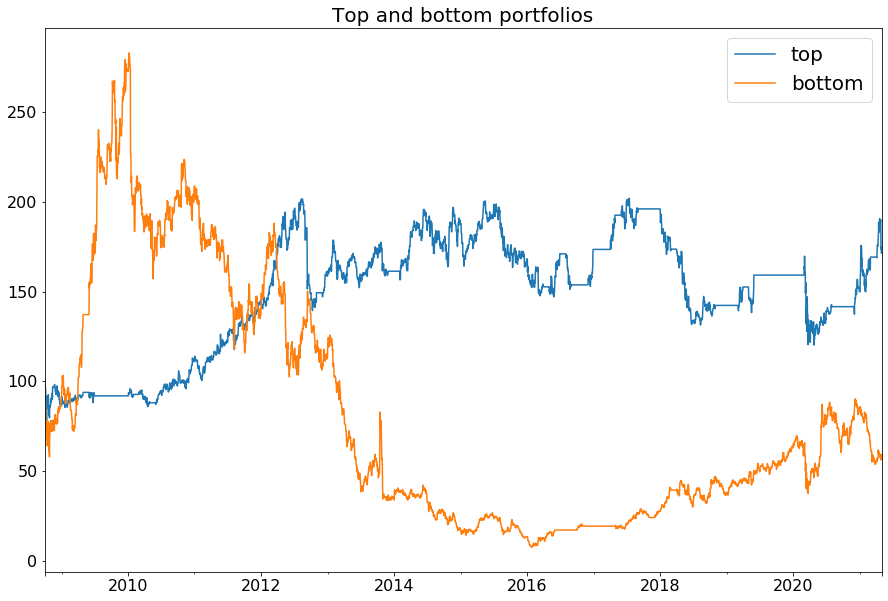

In [9]:
backtests.plot(figsize=(15,10), fontsize=16)
plt.title('Top and bottom portfolios', fontsize=20)
plt.legend(fontsize=20)
plt.show()

#### Low vol with Momentum portfolios

Let's now choose positive momentum stocks among those with low vol:

In [10]:
vol_then_mom_portfolios = {}
for eom in month_ends:
    stocks_on_date = vol_signals.loc[eom][vol_signals.loc[eom].abs()>0.0003].dropna().rank(ascending=False)
    n = stocks_on_date.shape[0]
    low_vol_stocks = list(stocks_on_date[stocks_on_date>n-n/5].index)
    stocks_on_date = mom_signals.loc[eom, low_vol_stocks]
    stocks_on_date = stocks_on_date[stocks_on_date.abs()>0.0003].dropna().rank()
    n = stocks_on_date.shape[0]
    low_vol_and_mom_stocks = list(stocks_on_date[stocks_on_date>n-n/5].index)
    vol_then_mom_portfolios[eom] = low_vol_and_mom_stocks

In [11]:
calendar = [d for d in tr_df.index.unique() if d>=month_ends[0]]
double_sort_backtest = pd.Series(index=calendar)
double_sort_backtest.iloc[0] = 100

d = month_ends[0]
w = ibov_composition.loc[d, vol_then_mom_portfolios[d]]
w = w/w.sum()
ref_date = max([x for x in tr_df.index.unique() if x < d])
q = double_sort_backtest.iloc[0] * w / tr_df.loc[d, w.index]

for tdy, yst in zip(calendar[1:], calendar[:-1]):
    
    # calculate pnl of the top stocks
    p1 = tr_df.loc[tdy, q.index]
    p0 = tr_df.loc[yst, q.index]
    toppnl = (q * (p1 - p0)).sum()
    double_sort_backtest.loc[tdy] = double_sort_backtest.loc[yst] + toppnl
    
    if yst in vol_then_mom_portfolios.keys(): # rebalance the portfolio      
        w = ibov_composition.loc[d, vol_then_mom_portfolios[yst]]
        w = w/w.sum()
        q = double_sort_backtest.loc[tdy] * w / tr_df.loc[yst, w.index]
            
double_sort_backtest.head()

2008-09-30    100.000000
2008-10-01    101.819443
2008-10-02     99.607373
2008-10-03     95.777638
2008-10-04     95.777638
dtype: float64

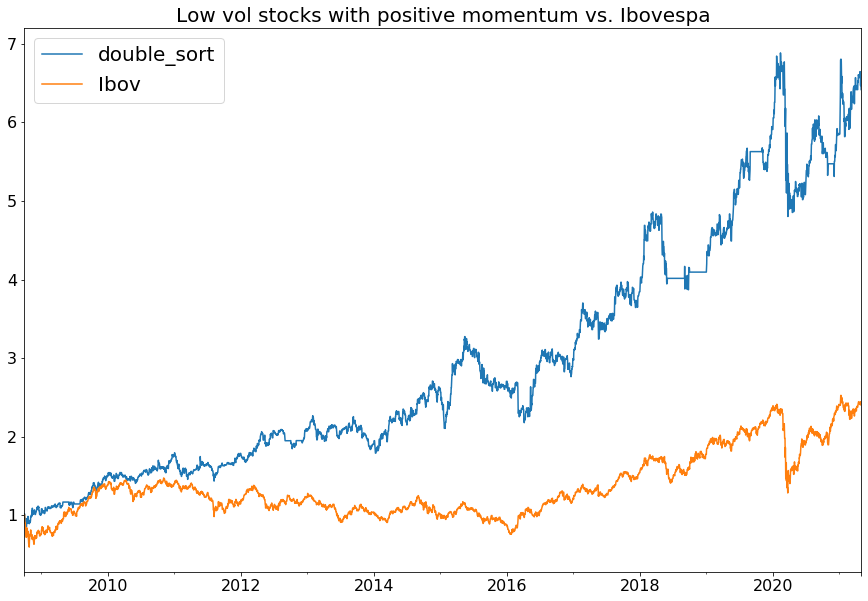

In [12]:
df2 = pd.concat([double_sort_backtest.to_frame('double_sort'), df], axis=1, sort=True).dropna().drop('CDI', 1).astype(float)
df2 = np.exp(np.log(df2).diff(1).fillna(0).cumsum())
df2.plot(figsize=(15,10), fontsize=16)
plt.title('Low vol stocks with positive momentum vs. Ibovespa', fontsize=20)
plt.legend(fontsize=20)
plt.show()